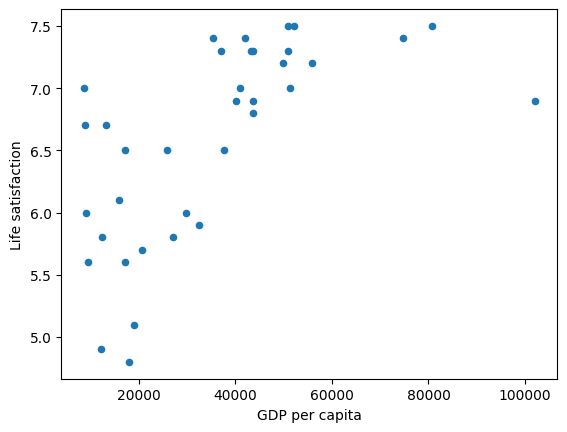

[[6.28653637]]


In [10]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model
# Carrega os dados
oecd_bli = pd.read_csv("oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv("gdp_per_capita.csv",thousands=',',delimiter='\t',
encoding="latin1", na_values="n/a")

def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                left_index=True, right_index=True)
    full_country_stats = full_country_stats[["GDP per capita", "Life satisfaction"]]
    return full_country_stats

# Prepara os dados
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]
# Visualiza os dados
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()
# Seleciona um modelo linear
model = sklearn.linear_model.LinearRegression()
# Treina o modelo
model.fit(X, y)
# Efetua uma predição para o Chipre
X_new = [[22587]] # PIB per capita do Chipre
print(model.predict(X_new)) # Entradas [[ 5.96242338]]